<a href="https://colab.research.google.com/github/MasahiroAraki/SpeechRecognition/blob/master/Python/pyintro3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 推測統計の基礎

* 母集団と標本
* 確率モデル

このnotebookは「谷合廣紀著: Pythonで理解する統計解析の基礎」を参考にしています。

In [2]:
# 必要なimport
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

In [4]:
# notebookの設定
%precision 3
pd.options.display.precision = 3

## 母集団と標本


In [5]:
# 白玉(w) 8個、赤玉(r) 2個の集合を作成

data = ['w']*8 + ['r']*2
data

['w', 'w', 'w', 'w', 'w', 'w', 'w', 'w', 'r', 'r']

In [27]:
# 10000回復元抽出を行って、母集団の割合を推定
import collections

total = {'w': 0, 'r': 0}
for _ in range(10000):
    c = collections.Counter(np.random.choice(data, 5))
    total['w'] += c['w']
    total['r'] += c['r']
print(f"white: {total['w']/5000},  red: {total['r']/5000}")

white: 7.9676,  red: 2.0324


In [28]:
# 非復元抽出

total = {'w': 0, 'r': 0}
for _ in range(10000):
    c = collections.Counter(np.random.choice(data, 5, replace=False))
    total['w'] += c['w']
    total['r'] += c['r']
print(f"white: {total['w']/5000},  red: {total['r']/5000}")

white: 8.0104,  red: 1.9896


例題：全校生徒300人が同じテストを受けた。平均点などは公開されていないが、ある生徒が自分のテストのできを調べるため、ランダムに20人を選んで点数を聞き、平均点を推測した。

In [6]:
# 300人のテスト受験者（母集団）から20人分を非復元抽出
all_scores = np.random.randint(100, size=300)
samples = np.random.choice(all_scores, 20, replace=False)
print(samples)
print(f'母集団平均: {all_scores.mean():.3}, 標本平均: {samples.mean():.3}')

[94 16 78 48 19 93  8  5 31 34 74  3 15 44  7 45 65 13 58  5]
母集団平均: 45.6, 標本平均: 37.8


In [7]:
# 母集団の平均と標本の平均の比較

all_scores.mean(), samples.mean()

(45.60666666666667, 37.75)

## 確率分布


### 離散確率分布

#### ベルヌーイ分布

とりうる値が0または1の2種類しかないときの確率分布。1が出る確率pが分布のパラメータとなり、0が出る確率は1-pとなる。ベルヌーイ分布の期待値はp、分散はp(1-p)となる。

$$
f(x) = 
\begin{cases}
p^x (1-p)^{(1-x)} ~~ (x \in \{0,1\})\\
0 ~~~~~~~~~~~~~~~~~~~ (otherwise)
\end{cases}
$$

In [8]:
# ベルヌーイ分布

from scipy import stats

rv = stats.bernoulli(0.2)
# 確率質量関数の計算はpmfメソッドを用いる。引数は確率変数の値
rv.pmf(0), rv.pmf(1)

(0.8, 0.2)

#### 二項分布

ベルヌーイ試行をn回行ったときの1のでる回数が従う分布。とりうる値は0からnとなる。分布のパラメータはnとpであり、期待値はnp、分散はnp(1-p)である。

$$
f(x) = 
\begin{cases}
{}_n \mathrm{C}_x p^x (1-p)^{(n-x)} ~~ (x \in \{0,1,\dots,n\})\\
0 ~~~~~~~~~~~~~~~~~~~ (otherwise)
\end{cases}
$$

<BarContainer object of 12 artists>

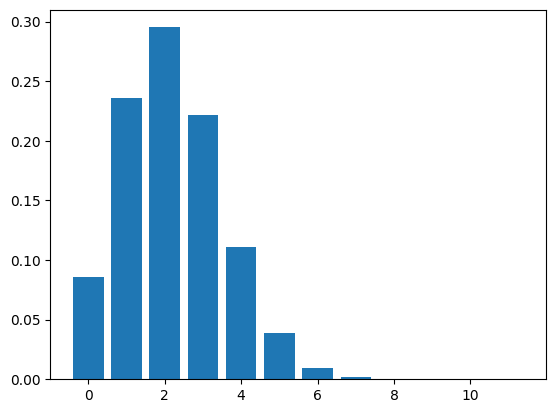

In [9]:
# 二項分布
# 表が出る確率が0,2のコインを11回投げたときの表が出る回数の分布

rv = stats.binom(11, 0.2)
linenum = range(0, 12)
plt.bar(linenum, rv.pmf(linenum))

#### 幾何分布

ベルヌーイ試行が初めて成功するまでの試行回数の分布。とりうる値は整数全体。パラメータはp。期待値は$1/p$、分散は$(1-p)/p^2$。

$$
f(x) = 
\begin{cases}
(1-p)^{(x-1)}p ~~ (x \in \{1,2,3,\dots\})\\
0 ~~~~~~~~~~~~~~~~~~~ (otherwise)
\end{cases}
$$

<BarContainer object of 30 artists>

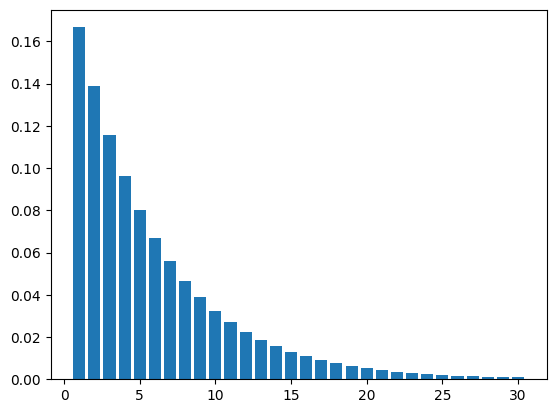

In [10]:
# 1が出る確率が 1/6 のサイコロで、初めて1が出るまで振る回数の分布
rv = stats.geom(1/6)
linenum = range(1,31)
plt.bar(linenum, rv.pmf(linenum))

#### ポアソン分布

ランダムな事象が単位時間あたりに発生する件数の分布。とりうる値は0と整数全体。パラメータは$\lambda$。期待値、分散とも$\lambda$。

ポアソン分布は二項分布の極限。詳細は[高校数学の美しい物語「ポアソン分布の意味と平均・分散」](https://manabitimes.jp/math/924)を参照。

$$
f(x) = 
\begin{cases}
\frac{\lambda^x}{x!} e^{-\lambda} ~~ (x \in \{0,1,2,\dots\})\\
0 ~~~~~~~~~~~~~~~~~~~ (otherwise)
\end{cases}
$$

<BarContainer object of 11 artists>

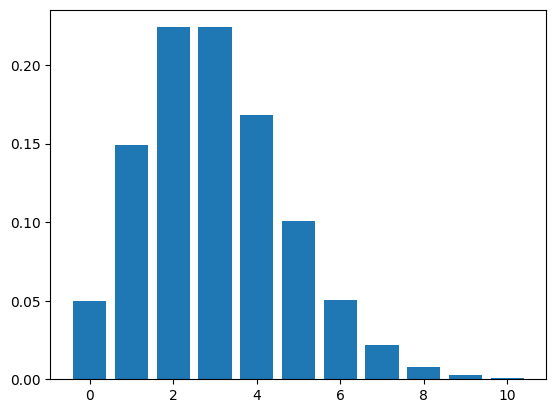

In [11]:
# 単位時間あたりに平均3回事象が起こるときの発生件数の分布
rv = stats.poisson(3)
linenum = range(0,11)
plt.bar(linenum, rv.pmf(linenum))

## 連続確率分布

連続値を値とする確率分布は確率密度関数で表す。連続値の場合は、特定の値をとる確率は0なので、区間を指定して積分で確率を表す。

分布の計算をしやすくするために、値がある値以下になる確率を累積分布関数(CDF)とよび、特定の区間の確率はこのCDFの差で求めることができる。

### 正規分布

自然界の多くの現象が従う分布。パラメータは平均と分散。

$$
f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\{-\frac{(x - \mu)^2}{2\sigma^2}\} ~~~(-\infty < x < \infty)
$$

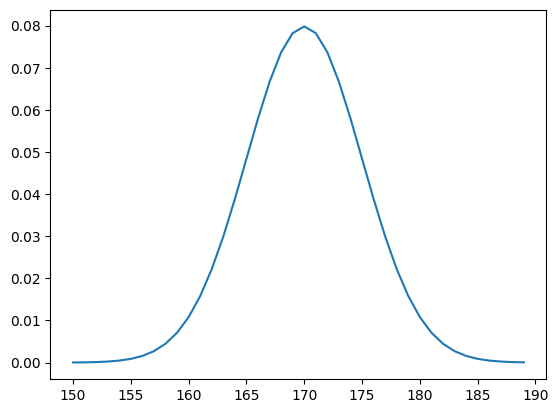

In [12]:
# 平均身長が170cm、標準偏差が5cmの正規分布（架空の設定）
rv = stats.norm(170, 5)
linenum = range(150,190)
plt.plot(linenum, rv.pdf(linenum))

In [13]:
# 180cmまでの累積分布
rv.cdf(180)

0.9772498680518208

In [14]:
# 160cmから180cmの人に出会う確率
rv.cdf(180)-rv.cdf(160)

0.9544997361036416

In [15]:
# 高身長上位10%となる値
rv.isf(0.1)

176.407757827723

In [16]:
# 全体の90%範囲
rv.interval(.90)

(161.77573186524265, 178.22426813475735)

### 指数分布

ある事象が発生する間隔が従う分布。パラメータは単位時間あたりの事象の平均発生回数$\lambda$。期待値は$1/\lambda$、分散は$1/\lambda^2$。

$$
f(x) = 
\begin{cases}
\lambda e^{-\lambda x} ~~ (x \geq 0)\\
0 ~~~~~~~~~~ (otherwise)
\end{cases}
$$

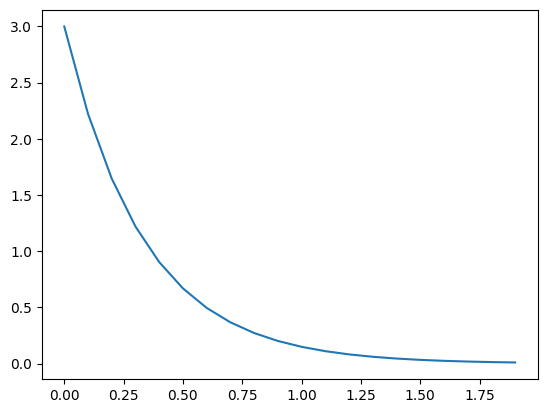

In [17]:
rv = stats.expon(scale=1/3)
linenum = np.arange(0,2,0.1)
plt.plot(linenum, rv.pdf(linenum))

In [18]:
# 平均して1日3件交通事故が発生する地域で、2日以内に事故が発生する確率
rv.cdf(2)

0.9975212478233336

### カイ二乗分布

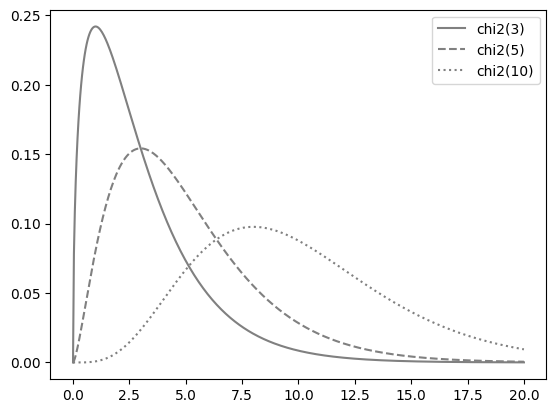

In [19]:
# 自由度の異なるカイ二乗分布をプロット
xs = np.linspace(0, 20, 500)
for n, ls in zip([3, 5, 10], ['-', '--', ':']):
  rv = stats.chi2(n)
  plt.plot(xs, rv.pdf(xs), label=f'chi2({n})', ls=ls, color='gray')
plt.legend()

### t分布

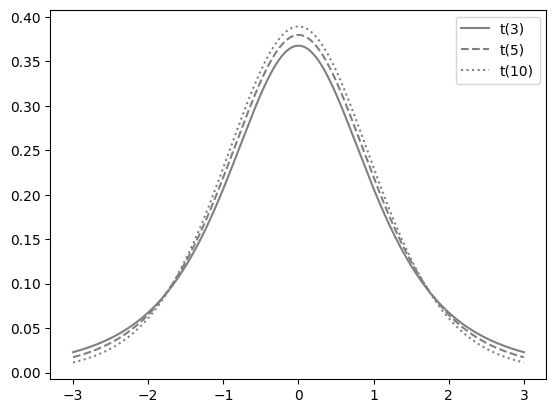

In [20]:
# 自由度の異なるt分布をプロット
xs = np.linspace(-3, 3, 500)
for n, ls in zip([3, 5, 10], ['-', '--', ':']):
  rv = stats.t(n)
  plt.plot(xs, rv.pdf(xs), label=f't({n})', ls=ls, color='gray')
plt.legend()

### F分布

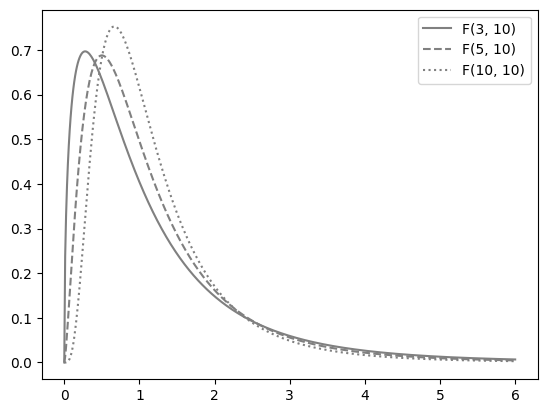

In [21]:
# 1つめの自由度の異なるF分布をプロット
xs = np.linspace(0, 6, 500)
for n, ls in zip([3, 5, 10], ['-', '--', ':']):
  rv = stats.f(n, 10)
  plt.plot(xs, rv.pdf(xs), label=f'F({n}, 10)', ls=ls, color='gray')
plt.legend()

## 練習問題

In [22]:
# 表が出る確率が0.2のコインを11回投げたときに、過半数回表が出る確率
from scipy import stats
rv = stats.binom(11, 0.2)
rv.sf(6)

0.0019653632000000004